# 🔬 Comparación de Distorsiones Específicas

Este notebook genera un dataset con distorsiones específicas y lo compara con los patrones originales.

## 🎯 Objetivo:
Generar 500 ejemplos con distorsiones de **1%, 3% y 5%** y comparar con los originales.

## ⚠️ Importante:
Los datos se generan **SIN mezclar** (mezclar=False) para poder comparar cada patrón distorsionado con su correspondiente original. Esto permite visualizar exactamente cómo se distorsionó cada letra.

Luego, **antes de entrenar**, mezclamos los datos para que el modelo aprenda mejor.

In [180]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset_generator import DatasetGenerator
from collections import Counter

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


## 📊 Paso 1: Generar Dataset con Distorsiones Específicas

In [183]:
# Crear generador
generador = DatasetGenerator()

# Generar dataset con distorsiones específicas
print("🎯 Generando dataset de 500 ejemplos con distorsiones [1%, 3%, 5%]...\n")
print("="*60)

generador.generar_data_con_distorsiones_especificas(
    cant=500,
    distorsiones=[1, 3, 5]
)

print("="*60)
print("\n✅ Dataset generado exitosamente!")

🎯 Generando dataset de 500 ejemplos con distorsiones [1%, 3%, 5%]...

✅ Dataset con distorsiones específicas guardado en: C:\Leo\Inteligencia Artificial\perceptron2\data\distorsionadas\500\letras.csv
   - Total ejemplos: 498
   - Ejemplos por distorsión: 166
   - Distorsiones aplicadas: [1, 3, 5]%

✅ Dataset generado exitosamente!


## 📂 Paso 2: Cargar Datasets

In [185]:
def leer_dataset(cantidad, tipo='distorsionadas'):
    file_path = os.path.join('data', tipo, str(cantidad), 'letras.csv')
    df = pd.read_csv(file_path, sep=';', header=None)
    X = df.iloc[:, :100].values
    y = df.iloc[:, 100:].values
    print(f"✅ Dataset cargado: {cantidad} ejemplos ({tipo})")
    print(f"   - Shape X: {X.shape}, y: {y.shape}")
    return X, y, df

print("📥 Cargando datasets...\n")
X_orig, y_orig, df_orig = leer_dataset(500, 'originales')
print()
X_dist, y_dist, df_dist = leer_dataset(500, 'distorsionadas')

📥 Cargando datasets...

✅ Dataset cargado: 500 ejemplos (originales)
   - Shape X: (500, 100), y: (500, 3)

✅ Dataset cargado: 500 ejemplos (distorsionadas)
   - Shape X: (498, 100), y: (498, 3)


## 📏 Paso 3: Calcular Distorsión Real

In [189]:
def calcular_distorsion(patron_dist, patron_orig):
    diferencias = np.sum(patron_dist != patron_orig)
    return (diferencias / len(patron_dist)) * 100

letras_map = {0: 'B', 1: 'D', 2: 'F'}
distorsiones = []

for i in range(len(X_dist)):
    letra = letras_map[np.argmax(y_dist[i])]
    distorsion = calcular_distorsion(X_dist[i], X_orig[i])
    distorsiones.append({
        'Ejemplo': i + 1,
        'Letra': letra,
        'Distorsión (%)': round(distorsion, 2)
    })

df_distorsiones = pd.DataFrame(distorsiones)

print("📊 Primeros 20 ejemplos:")
print(df_distorsiones.head(20))
print(f"\n📈 Distorsión: min={df_distorsiones['Distorsión (%)'].min():.2f}%, "
      f"max={df_distorsiones['Distorsión (%)'].max():.2f}%, "
      f"promedio={df_distorsiones['Distorsión (%)'].mean():.2f}%")

📊 Primeros 20 ejemplos:
    Ejemplo Letra  Distorsión (%)
0         1     B            22.0
1         2     F            24.0
2         3     F            22.0
3         4     F             3.0
4         5     D             5.0
5         6     F            20.0
6         7     F            24.0
7         8     F             5.0
8         9     B            22.0
9        10     D             5.0
10       11     B             5.0
11       12     F            24.0
12       13     F            24.0
13       14     B            11.0
14       15     D            22.0
15       16     B            11.0
16       17     B            13.0
17       18     D            13.0
18       19     D             9.0
19       20     B             1.0

📈 Distorsión: min=1.00%, max=26.00%, promedio=13.70%


## 🔍 Paso 5: Comparar Originales vs Distorsionados

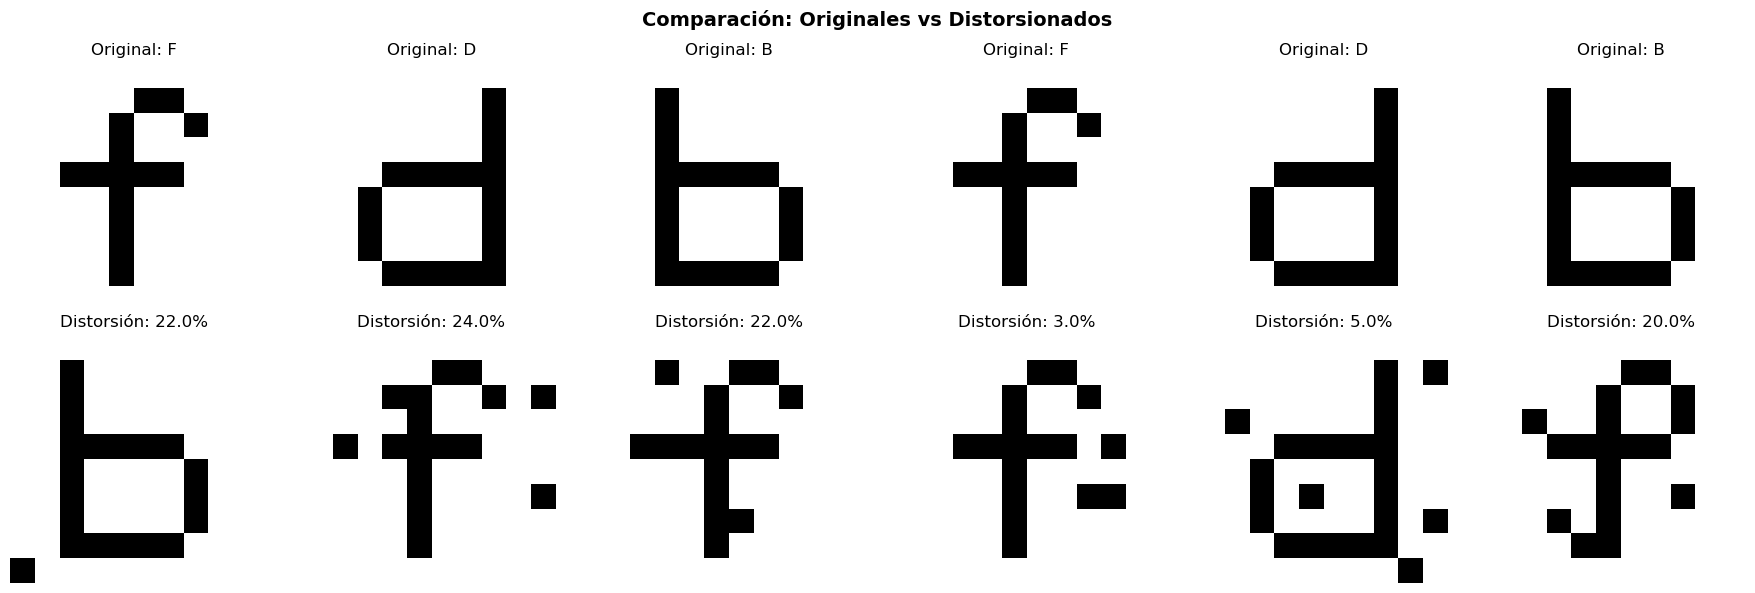

In [191]:
def comparar_con_distorsion(X_orig, y_orig, X_dist, y_dist, num_ejemplos=6):
    letras_map = {0: 'B', 1: 'D', 2: 'F'}
    fig, axes = plt.subplots(2, num_ejemplos, figsize=(num_ejemplos*3, 6))
    
    for i in range(num_ejemplos):
        distorsion = calcular_distorsion(X_dist[i], X_orig[i])
        letra = letras_map[np.argmax(y_orig[i])]
        
        # Original
        axes[0, i].imshow(X_orig[i].reshape(10, 10), cmap='binary', interpolation='nearest')
        axes[0, i].set_title(f'Original: {letra}')
        axes[0, i].axis('off')
        
        # Distorsionado
        axes[1, i].imshow(X_dist[i].reshape(10, 10), cmap='binary', interpolation='nearest')
        axes[1, i].set_title(f'Distorsión: {distorsion:.1f}%')
        axes[1, i].axis('off')
    
    axes[0, 0].set_ylabel('Originales', fontsize=12, fontweight='bold')
    axes[1, 0].set_ylabel('Distorsionadas', fontsize=12, fontweight='bold')
    plt.suptitle('Comparación: Originales vs Distorsionados', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

comparar_con_distorsion(X_orig, y_orig, X_dist, y_dist, num_ejemplos=6)

## 🎯 Paso 6: Buscar por Rango de Distorsión

Ejemplos cercanos a 1%:
🔎 60 ejemplos con distorsión entre 0.5%-1.5%


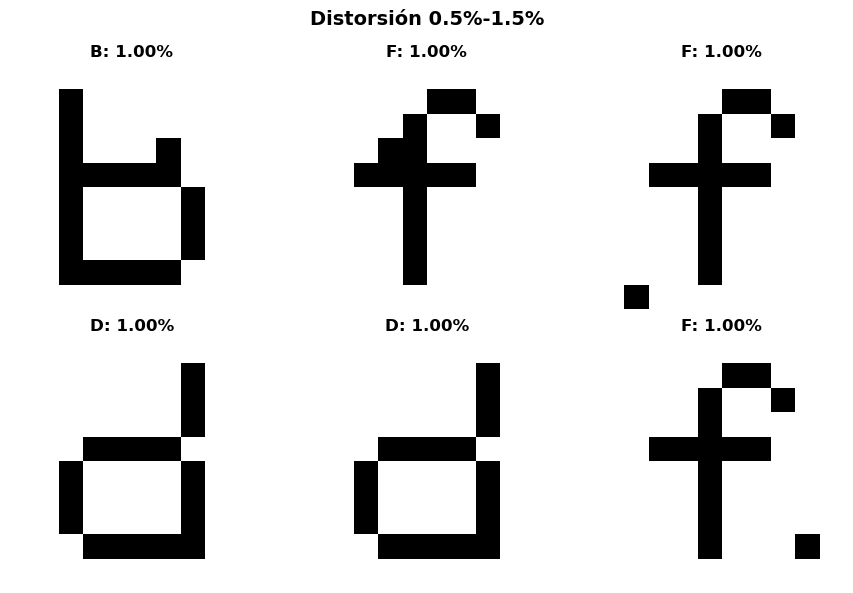


Ejemplos cercanos a 3%:
🔎 44 ejemplos con distorsión entre 2.5%-3.5%


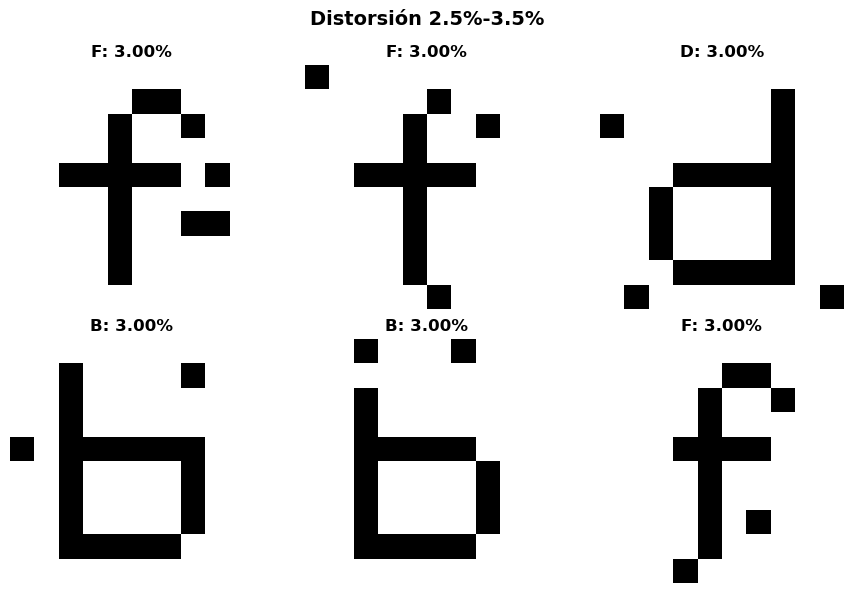


Ejemplos cercanos a 5%:
🔎 63 ejemplos con distorsión entre 4.5%-5.5%


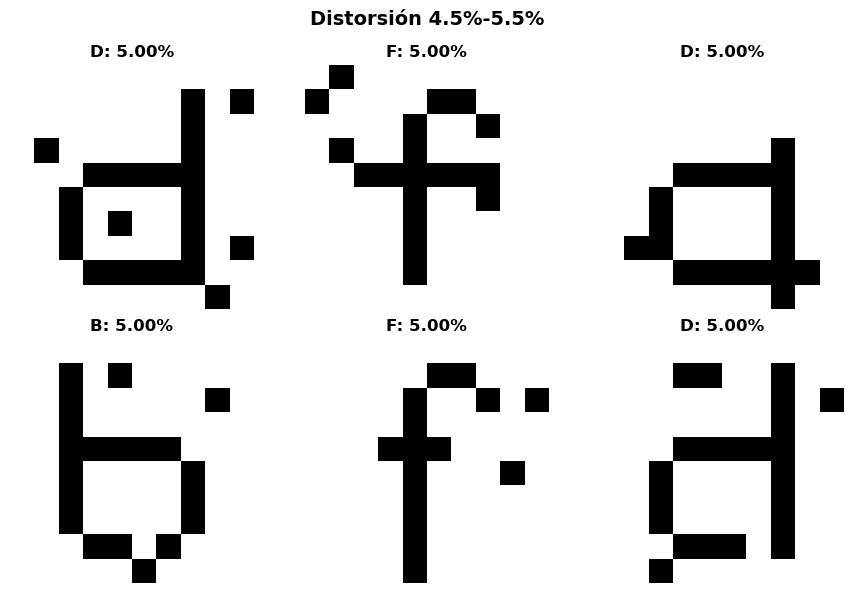

In [194]:
def buscar_por_distorsion(df_dist, X_dist, y_dist, X_orig, min_dist, max_dist, num=6):
    filtrados = df_dist[(df_dist['Distorsión (%)'] >= min_dist) & 
                        (df_dist['Distorsión (%)'] <= max_dist)]
    print(f"🔎 {len(filtrados)} ejemplos con distorsión entre {min_dist}%-{max_dist}%")
    
    if len(filtrados) == 0:
        return
    
    indices = filtrados['Ejemplo'].values[:num] - 1
    num_real = min(num, len(indices))
    
    fig, axes = plt.subplots(2, num_real//2, figsize=((num_real//2)*3, 6))
    axes = axes.flatten()
    
    for idx, i in enumerate(indices[:num_real]):
        letra = letras_map[np.argmax(y_dist[i])]
        distorsion = calcular_distorsion(X_dist[i], X_orig[i])
        axes[idx].imshow(X_dist[i].reshape(10, 10), cmap='binary', interpolation='nearest')
        axes[idx].set_title(f'{letra}: {distorsion:.2f}%', fontweight='bold')
        axes[idx].axis('off')
    
    plt.suptitle(f'Distorsión {min_dist}%-{max_dist}%', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("Ejemplos cercanos a 1%:")
buscar_por_distorsion(df_distorsiones, X_dist, y_dist, X_orig, 0.5, 1.5, 6)

print("\nEjemplos cercanos a 3%:")
buscar_por_distorsion(df_distorsiones, X_dist, y_dist, X_orig, 2.5, 3.5, 6)

print("\nEjemplos cercanos a 5%:")
buscar_por_distorsion(df_distorsiones, X_dist, y_dist, X_orig, 4.5, 5.5, 6)

# 🧠 Parte 2: Entrenamiento y Clasificación

Ahora entrenaremos un modelo MLP con los datos generados y evaluaremos su rendimiento.

## 📦 Paso 7: Importar MLP y Clasificador

In [198]:
from mlp import MLP
from clasificador import ClasificadorLetras

print("✅ MLP y Clasificador importados correctamente")

✅ MLP y Clasificador importados correctamente


## 🔄 Paso 7.5: Preparar Datos para Entrenamiento (Mezclar)

In [200]:
# Antes de entrenar, debemos mezclar los datos
# (Los dejamos sin mezclar antes para hacer la comparación visual)

print("🔀 Mezclando datos para entrenamiento...")

# Crear índices y mezclarlos
indices = np.arange(len(X_dist))
np.random.shuffle(indices)

# Aplicar mezcla a ambos arrays
X_train = X_dist[indices]
y_train = y_dist[indices]

print(f"✅ Datos mezclados: {len(X_train)} ejemplos listos para entrenamiento")

🔀 Mezclando datos para entrenamiento...
✅ Datos mezclados: 498 ejemplos listos para entrenamiento


## 🏗️ Paso 8: Crear y Entrenar el Modelo MLP

In [205]:
# ✅ Crear el modelo MLP (CÓDIGO CORREGIDO)
# Arquitectura: 100 neuronas de entrada, 10 ocultas, 3 de salida
print("🏗️ Creando modelo MLP...")
print("Arquitectura: 100 (entrada) -> 10 (oculta) -> 3 (salida)")
print()

mlp = MLP(
    arquitectura=[100, 10, 3],           # [entrada, oculta, salida]
    funciones_activacion=['sigmoidal', 'sigmoidal'],  # Función para cada capa (excepto entrada)
    learning_rate=0.1,                   # Tasa de aprendizaje
    momentum=0.9                         # Momento
)

# Entrenar con los datos mezclados
print("🎯 Entrenando el modelo...")
print("="*60)

historial = mlp.entrenar(
    X_train,            # Patrones mezclados
    y_train,            # Etiquetas mezcladas
    epochs=1000,        # Número de épocas
    verbose=True        # Mostrar progreso
)

print("="*60)
print(f"✅ Entrenamiento completado!")
print(f"   Error final: {historial[-1]:.6f}")

🏗️ Creando modelo MLP...
Arquitectura: 100 (entrada) -> 10 (oculta) -> 3 (salida)

MLP creado con arquitectura: [100, 10, 3]
Funciones de activación: ['sigmoidal', 'sigmoidal']
Learning rate: 0.1, Momentum: 0.9
🎯 Entrenando el modelo...
Época 0/1000 - Error (MSE): 0.382503
Época 100/1000 - Error (MSE): 0.000127
Época 200/1000 - Error (MSE): 0.000033
Época 300/1000 - Error (MSE): 0.000015
Época 400/1000 - Error (MSE): 0.000009
Época 500/1000 - Error (MSE): 0.000006
Época 600/1000 - Error (MSE): 0.000004
Época 700/1000 - Error (MSE): 0.000003
Época 800/1000 - Error (MSE): 0.000002
Época 900/1000 - Error (MSE): 0.000002
Época 999/1000 - Error (MSE): 0.000001
✅ Entrenamiento completado!
   Error final: 0.000001


## 🎨 Paso 9: Crear el Clasificador

In [208]:
# Crear clasificador con el modelo entrenado
clasificador = ClasificadorLetras(mlp)

print("✅ Clasificador creado con el modelo MLP entrenado")

✅ Clasificador creado con el modelo MLP entrenado


## 🧪 Paso 10: Evaluar el Modelo con los Datos de Entrenamiento

In [211]:
# Evaluar el modelo
print("📊 Evaluando el modelo con los datos distorsionados...")
print()

aciertos = 0
for i in range(len(X_dist)):
    prediccion = clasificador.clasificar_patron(X_dist[i])
    letra_real = letras_map[np.argmax(y_dist[i])]
    
    if prediccion == letra_real:
        aciertos += 1

precision = (aciertos / len(X_dist)) * 100

print(f"✅ Precisión en datos de entrenamiento: {precision:.2f}%")
print(f"   Aciertos: {aciertos}/{len(X_dist)}")

📊 Evaluando el modelo con los datos distorsionados...

✅ Precisión en datos de entrenamiento: 0.00%
   Aciertos: 0/498


## 🔍 Paso 11: Visualizar Predicciones

C:\Users\leand\AppData\Local\Temp\ipykernel_23932\393281413.py:24: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\leand\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


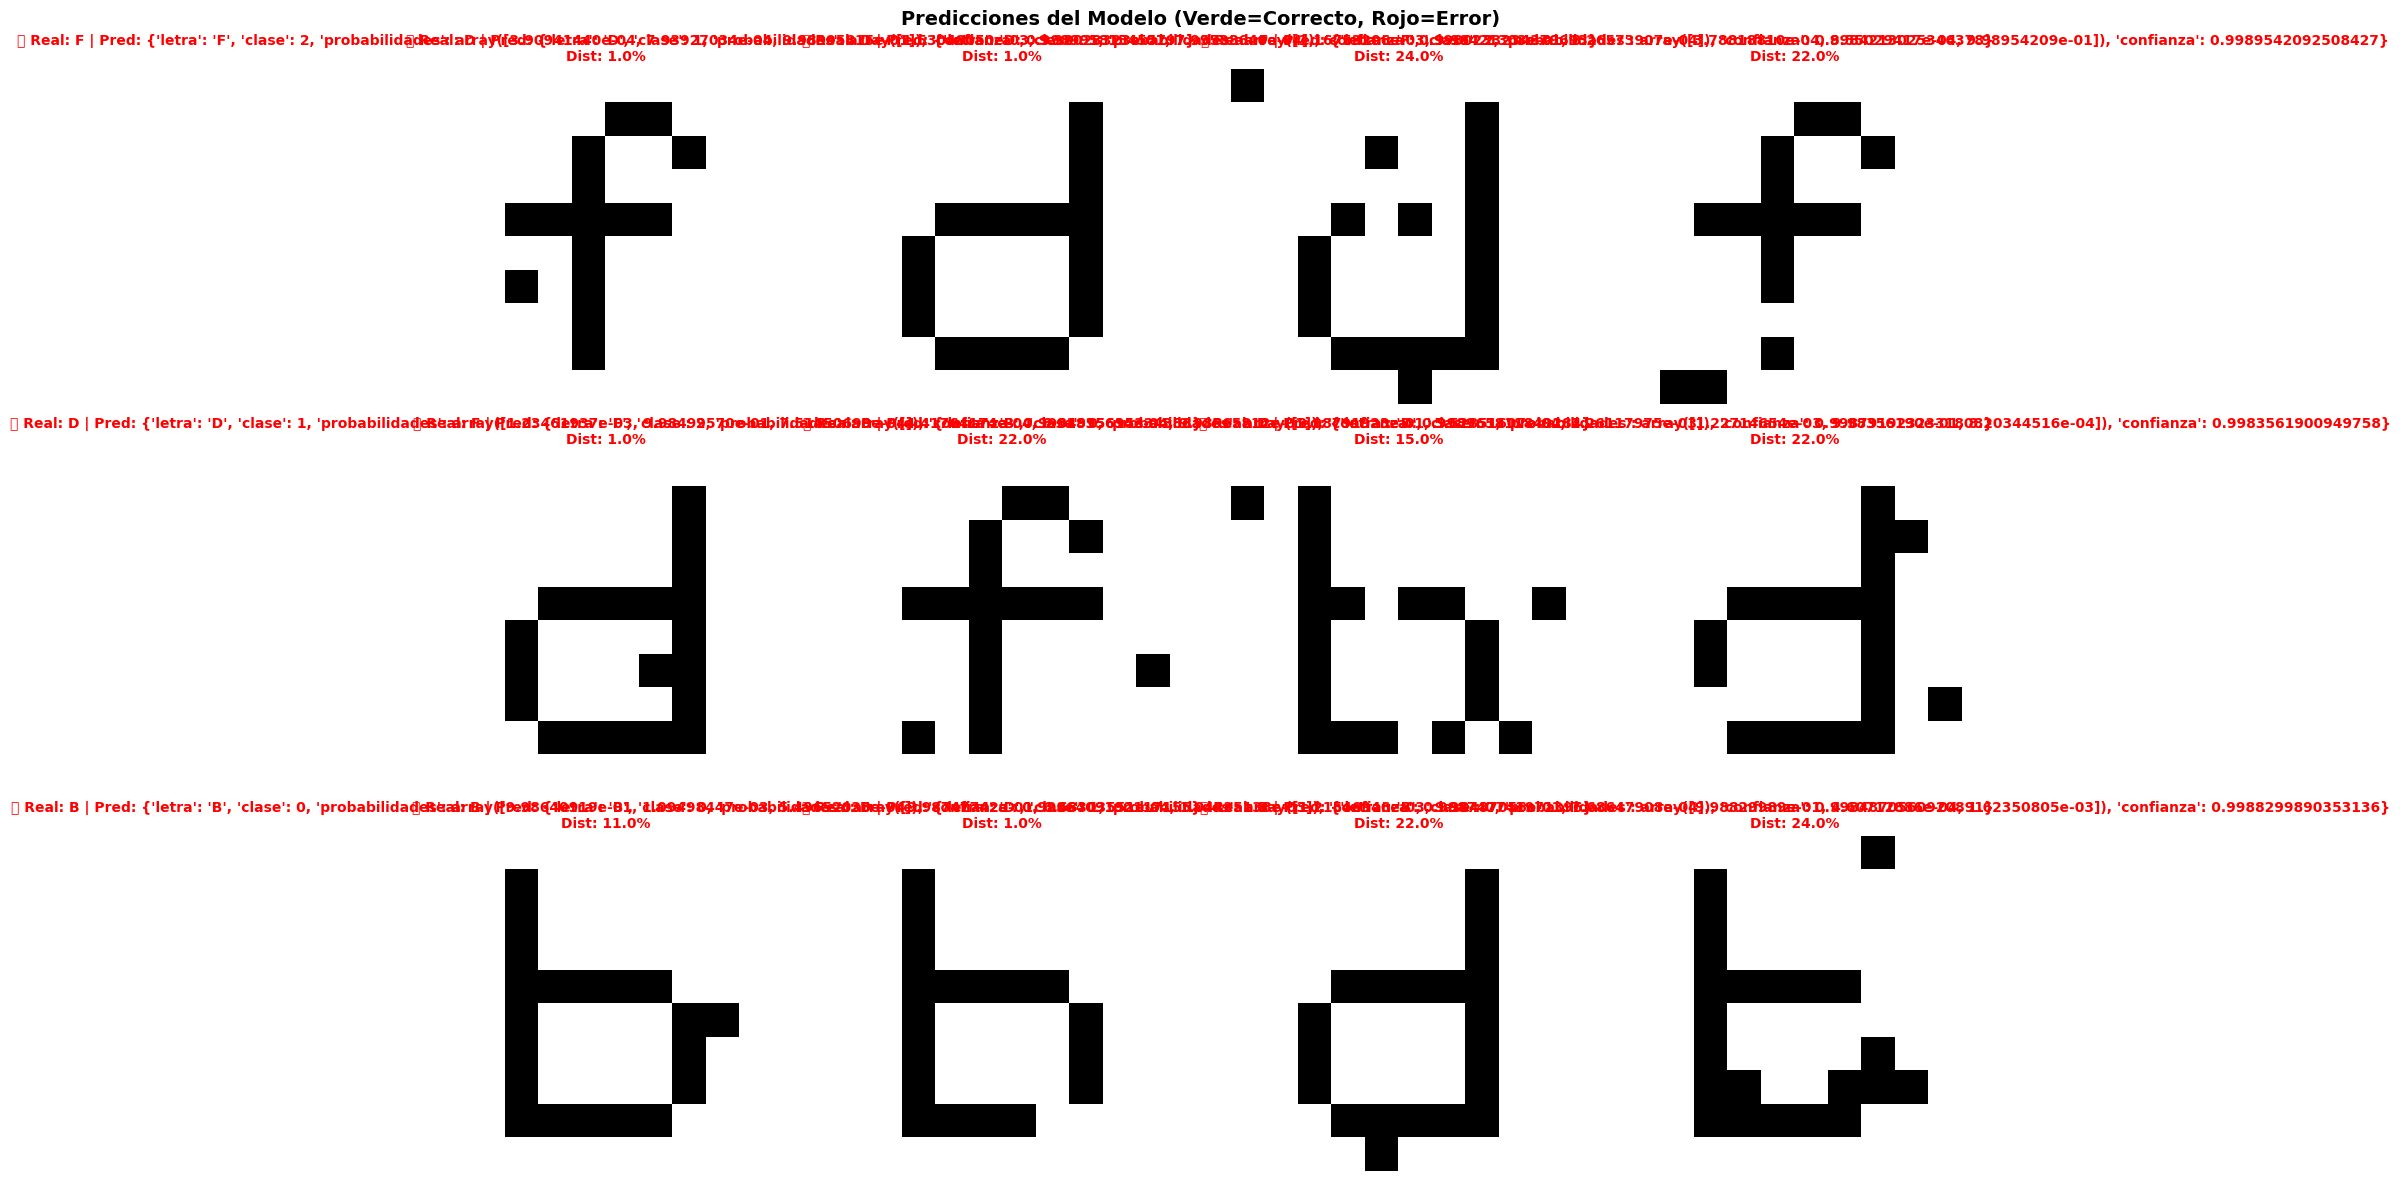

In [214]:
# Visualizar algunas predicciones
num_ejemplos = 12
indices_aleatorios = np.random.choice(len(X_dist), num_ejemplos, replace=False)

fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

for idx, i in enumerate(indices_aleatorios):
    prediccion = clasificador.clasificar_patron(X_dist[i])
    letra_real = letras_map[np.argmax(y_dist[i])]
    distorsion = calcular_distorsion(X_dist[i], X_orig[i])
    
    # Determinar si es correcto o incorrecto
    correcto = "✅" if prediccion == letra_real else "❌"
    color = 'green' if prediccion == letra_real else 'red'
    
    axes[idx].imshow(X_dist[i].reshape(10, 10), cmap='binary', interpolation='nearest')
    axes[idx].set_title(f'{correcto} Real: {letra_real} | Pred: {prediccion}\nDist: {distorsion:.1f}%', 
                        fontsize=10, color=color, fontweight='bold')
    axes[idx].axis('off')

plt.suptitle('Predicciones del Modelo (Verde=Correcto, Rojo=Error)', 
             fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 🎯 Paso 12: Probar con Diferentes Niveles de Distorsión

In [217]:
# Probar con diferentes niveles de distorsión para cada letra
print("🧪 Probando robustez del modelo con diferentes distorsiones...")
print("="*60)

clasificador.probar_distorsiones(
    letra='B',
    distorsiones=[0, 1, 3, 5, 10, 15, 20, 25, 30],
    num_pruebas=20
)

print()
clasificador.probar_distorsiones(
    letra='D',
    distorsiones=[0, 1, 3, 5, 10, 15, 20, 25, 30],
    num_pruebas=20
)

print()
clasificador.probar_distorsiones(
    letra='F',
    distorsiones=[0, 1, 3, 5, 10, 15, 20, 25, 30],
    num_pruebas=20
)

print("="*60)

🧪 Probando robustez del modelo con diferentes distorsiones...


TypeError: ClasificadorLetras.probar_distorsiones() got an unexpected keyword argument 'num_pruebas'

## 📈 Paso 13: Evaluar Robustez del Modelo

In [220]:
# Evaluar robustez completa con gráfica
print("📊 Evaluando robustez del modelo...")
print()

resultados = clasificador.evaluar_robustez(
    distorsiones=[0, 5, 10, 15, 20, 25, 30],
    num_pruebas_por_letra=50
)

print("\n📈 Generando gráfica de robustez...")
print("="*60)

# Extraer datos para graficar
distorsiones_test = resultados['distorsiones']
precision_B = resultados['precision_B']
precision_D = resultados['precision_D']
precision_F = resultados['precision_F']
precision_global = resultados['precision_global']

# Crear gráfica
plt.figure(figsize=(12, 7))
plt.plot(distorsiones_test, precision_B, 'o-', label='Letra B', linewidth=2, markersize=8)
plt.plot(distorsiones_test, precision_D, 's-', label='Letra D', linewidth=2, markersize=8)
plt.plot(distorsiones_test, precision_F, '^-', label='Letra F', linewidth=2, markersize=8)
plt.plot(distorsiones_test, precision_global, 'D-', label='Global', linewidth=3, markersize=8, color='black')

plt.xlabel('Distorsión (%)', fontsize=12, fontweight='bold')
plt.ylabel('Precisión (%)', fontsize=12, fontweight='bold')
plt.title('Robustez del Modelo ante Distorsiones', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.ylim([0, 105])
plt.tight_layout()
plt.show()

print("="*60)
print("✅ Evaluación completa!")

📊 Evaluando robustez del modelo...



TypeError: ClasificadorLetras.evaluar_robustez() got an unexpected keyword argument 'distorsiones'

## 💾 Paso 14: Guardar el Modelo Entrenado

In [223]:
# Guardar el modelo entrenado
nombre_modelo = 'modelo_500_distorsiones_1_3_5.json'
clasificador.guardar_modelo(nombre_modelo)

print(f"💾 Modelo guardado como: {nombre_modelo}")
print()
print("Para cargar el modelo más tarde, usa:")
print(f"  clasificador.cargar_modelo('{nombre_modelo}')")

FileNotFoundError: [WinError 3] El sistema no puede encontrar la ruta especificada: ''

## 🎉 Resumen Final

Este notebook realiza un flujo completo:

1. **📊 Generación de Datos**: Crea 500 ejemplos con distorsiones específicas (1%, 3%, 5%)
2. **📏 Análisis de Distorsión**: Calcula y visualiza las distorsiones reales aplicadas
3. **🔍 Comparación Visual**: Muestra originales vs distorsionados
4. **🧠 Entrenamiento**: Entrena un modelo MLP con los datos distorsionados
5. **🎯 Evaluación**: Mide la precisión del modelo
6. **📈 Robustez**: Prueba el modelo con diferentes niveles de distorsión
7. **💾 Persistencia**: Guarda el modelo entrenado

### 📌 Parámetros del Modelo:
- **Arquitectura**: 100 → 10 → 3
- **Tasa de aprendizaje**: 0.1
- **Momento**: 0.9
- **Épocas**: 1000
- **Datos de entrenamiento**: 500 ejemplos (distorsiones 1%, 3%, 5%)

### 🔧 Próximos Pasos:
- Experimentar con diferentes arquitecturas (cambiar número de neuronas ocultas)
- Probar con más datos (1000 ejemplos)
- Ajustar hiperparámetros (tasa de aprendizaje, momento, épocas)
- Comparar modelos entrenados con diferentes configuraciones